In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read csv file
data = pd.read_csv('dataset/Cleaned_Data.csv')
data.drop(columns=['Unnamed: 0'],inplace=True)
data

,id,comment_text,toxic,severe_toxic,cleaned_text,count
0,9e517781d3bf04b3,"Blocking, gagging, and so forth \n\nDoes it no...",0,0,block gag forth feel bit ridiculous protect ta...,121
1,5310be9129cdd382,"""\n\n A cup of tea for you! \n\n . """,0,0,cup tea,19
2,786d02526034fbe3,""":First point: Why should we keep this stuff? ...",0,0,first point keep stuff protoindoiranian cultur...,250
3,b60d10c5300853d3,"""\nThanks. The problem is that BLOAT is the pr...",0,0,thanks problem bloat problem stuff need remove...,316
4,f6dda5b833093d07,"I agree with SH, that sort of 'improvement' sh...",0,0,agree sh sort improvement illegal,52
...,...,...,...,...,...,...
19995,17eca6d66735a702,"""\n\n clarification needed \n\nExplain/clarify...",0,0,clarification need explainclarify word tolerat...,334
19996,59789fede899e8a6,"""\nI'll get to work on that. I'm going to chan...",0,0,get work go change name wikiproject texas univ...,171
19997,d17edba9aef2bc07,Labeling edits as vandalism when they are clea...,0,0,label edits vandalism clearly personal attack,62
19998,78b621b6182a1d7c,"""\nCould you please make this clear with the u...",0,0,could please make clear usual block template,58


# Row Count

In [12]:
severely_toxic_data = data[data["severe_toxic"] == 1]
severely_toxic_data.count()
index2 = severely_toxic_data.index
number_of_rows_severe_toxic = len(index2)
print("Number of severe toxic rows:", number_of_rows_severe_toxic)

toxic_data = data[data["toxic"] == 1]
index = toxic_data.index
number_of_rows_toxic = len(index)-number_of_rows_severe_toxic
print("Number of Slightly/Moderately toxic rows:", number_of_rows_toxic-number_of_rows_severe_toxic)

number_of_rows_non_toxic = len(data)-(number_of_rows_toxic-number_of_rows_severe_toxic)- number_of_rows_severe_toxic
print("Number of non toxic rows:", number_of_rows_non_toxic)

Number of severe toxic rows: 195
Number of Slightly/Moderately toxic rows: 1496
Number of non toxic rows: 18309


# Pie chart of the number of Toxic/Severe Toxic/Non-toxic rows

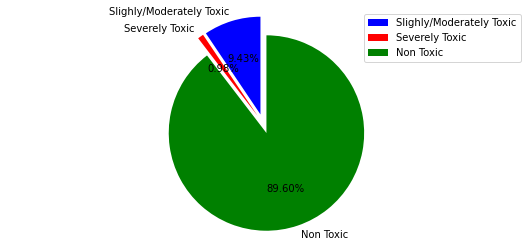

In [116]:
rows = [number_of_rows_toxic, number_of_rows_severe_toxic,number_of_rows_non_toxic]

mylabels=["Slighly/Moderately Toxic","Severely Toxic","Non Toxic"]
colors=['blue', 'red', 'green']
plt.pie(rows, labels = mylabels,colors=colors,startangle = 90,explode=[0.1, 0.1, 0.1],autopct='%1.2f%%')
plt.legend(title = "Toxicity:")
plt.legend()
plt.axis('equal')
plt.show() 

# Frequency Histogram (Overall)

<function matplotlib.pyplot.show(*args, **kw)>

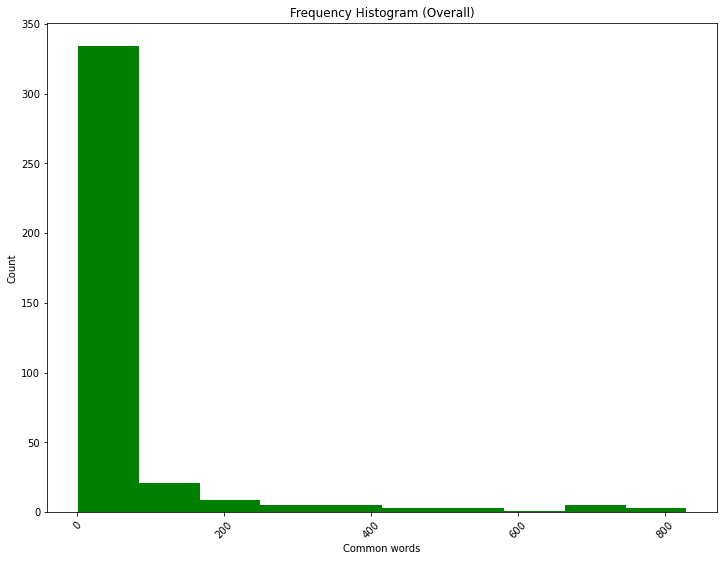

In [10]:
split_df= data["cleaned_text"].apply(lambda x: len(str(x).split(' ')))

plt.figure(figsize=(12,9))
plt.hist(split_df.value_counts(), color="green")
plt.xticks(rotation=45)
plt.xlabel("Common words")
plt.ylabel("Count")
plt.title("Frequency Histogram (Overall)")
plt.show

# Frequency Histogram (Slightly/Moderately Toxic)

<function matplotlib.pyplot.show(*args, **kw)>

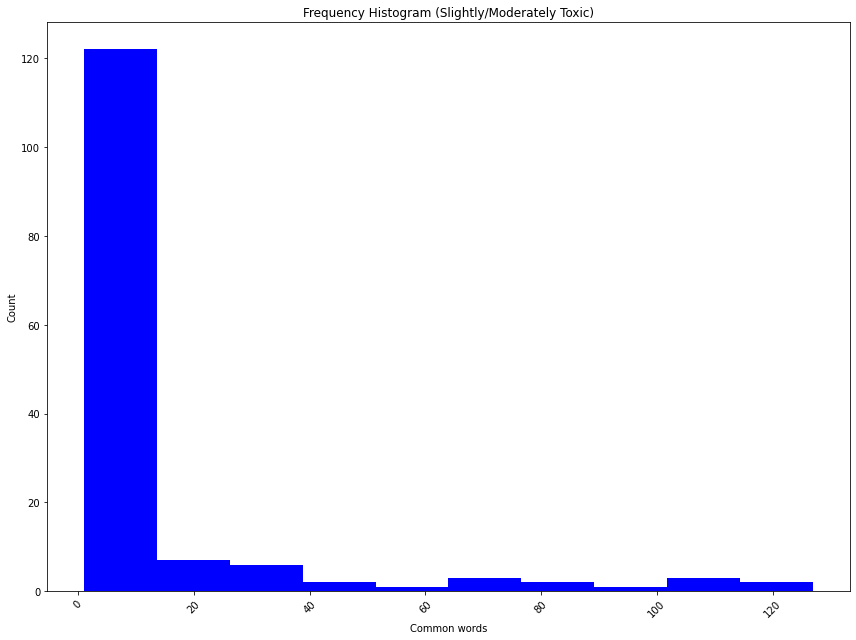

In [114]:
split_df= toxic_data["cleaned_text"].apply(lambda x: len(str(x).split(' ')))

plt.figure(figsize=(12,9))
plt.hist(split_df.value_counts(), color="blue")
plt.xticks(rotation=45)
plt.xlabel("Common words")
plt.ylabel("Count")
plt.title("Frequency Histogram (Slightly/Moderately Toxic)")
plt.show

# Frequency Histogram (Severely Toxic)

<function matplotlib.pyplot.show(*args, **kw)>

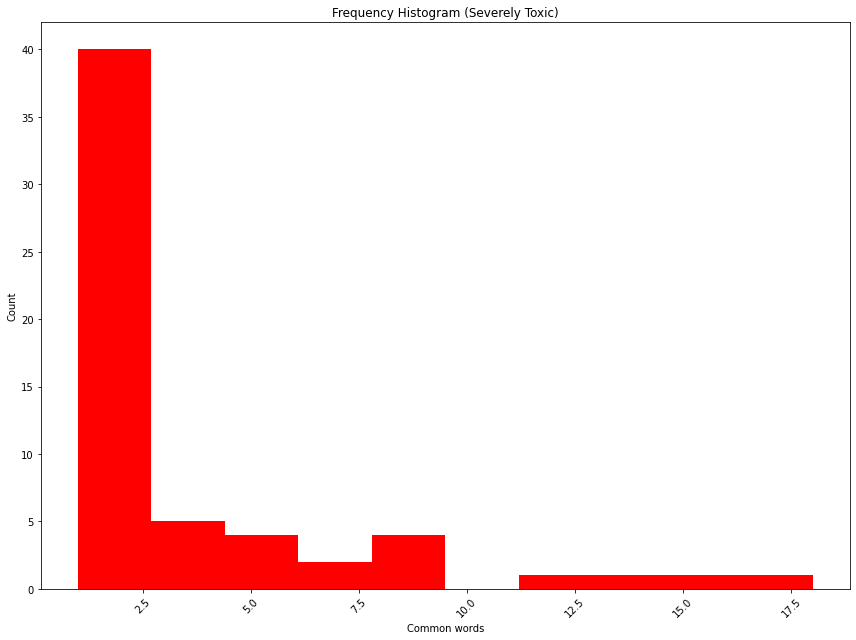

In [115]:
split_df= severely_toxic_data["cleaned_text"].apply(lambda x: len(str(x).split(' ')))

plt.figure(figsize=(12,9))
plt.hist(split_df.value_counts(), color="red")
plt.xticks(rotation=45)
plt.xlabel("Common words")
plt.ylabel("Count")
plt.title("Frequency Histogram (Severely Toxic)")
plt.show